In [2]:
import pickle
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme()
sns.set_style("darkgrid")
# sns.set_context("paper")
# sns.set_context("talk")

In [3]:
ax_order = 'first'
ax_order_str = 'axF'

In [19]:
with open('../../results/ratio_results_mlp.P', 'rb') as f:
    mlp_results = pickle.load(f)

with open('../../results/ratio_%s_results_rnn.P' %(ax_order_str), 'rb') as f:
    rnn_results = pickle.load(f)

with open('../../results/ratio_results_stepwisemlp.P', 'rb') as f:
    swmlp_results = pickle.load(f)


In [20]:
ratio_hidds_mlp    = mlp_results['ratio_results']['ratio_hidds']
ratio_hidds_rnn    = rnn_results['ratio_results']['ratio_hidds']
ratio_hidds_swmlp  = swmlp_results['ratio_results']['ratio_hidds']

runs, checkpoints:  20 21


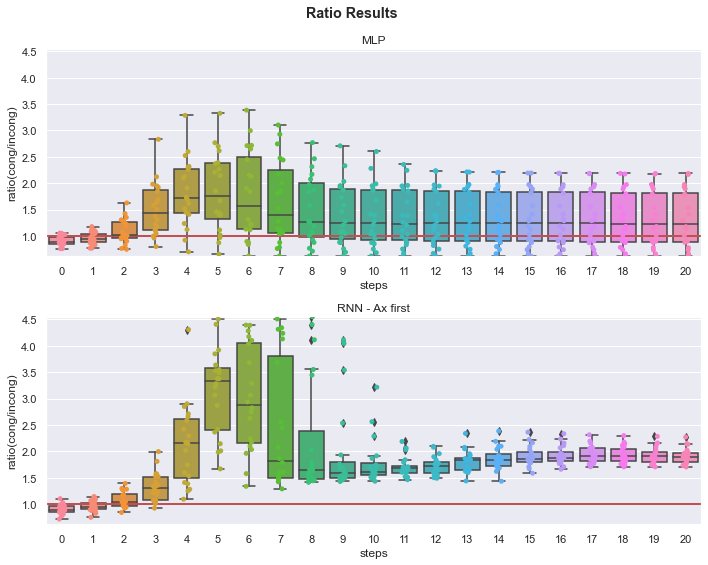

In [21]:
mi = min(min(np.min(ratio_hidds_mlp, axis=0)), 
         min(np.min(ratio_hidds_rnn, axis=0)))
mx = max(max(np.max(ratio_hidds_mlp, axis=0)), 
         max(np.max(ratio_hidds_rnn, axis=0)))


runs = ratio_hidds_mlp.shape[0]
checkpoints = ratio_hidds_mlp.shape[1]
print('runs, checkpoints: ', runs, checkpoints)

fig, axs = plt.subplots(2, 1, figsize=(10,8))
val_name = 'ratio(cong/incong)'
threshold = 1
# MLP
val = ratio_hidds_mlp
df = pd.DataFrame(val, columns= np.arange(checkpoints))
df.insert(0, 'runs', np.arange(runs))
df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
# plot
ax = axs[0]
ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
ax.set_title('MLP')

# RNN
val = ratio_hidds_rnn
df = pd.DataFrame(val, columns= np.arange(checkpoints))
df.insert(0, 'runs', np.arange(runs))
df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
# plot
ax = axs[1]
ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
ax.set_title('RNN - Ax %s' %(ax_order))

for ax in axs:
    ax.axhline(y=threshold, color='r', linewidth=2)
    ax.set_ylim([mi,mx])

fig.suptitle('Ratio Results ', fontweight='bold')
plt.tight_layout()
fig_str = '%s_ratio_results_both_models_hidds' %(ax_order_str)
fig.savefig(('../../figures/' + fig_str + '.jpg'), 
        bbox_inches = 'tight', pad_inches = 0)




# Inlcuding Stepwise MLP

runs, checkpoints:  20 21


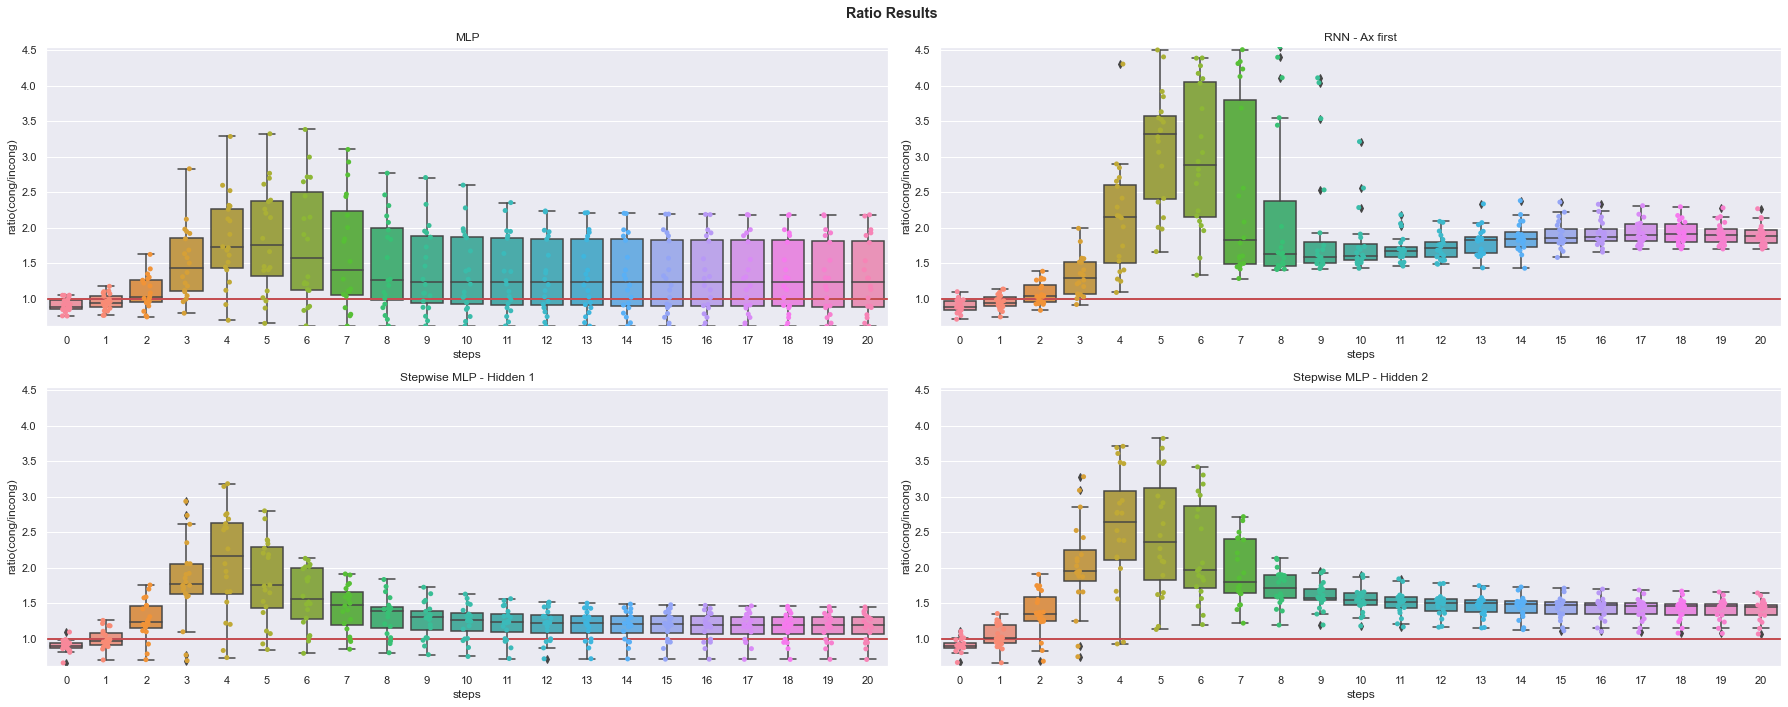

In [26]:

mi = min(min(np.min(ratio_hidds_mlp, axis=0)), 
         min(np.min(ratio_hidds_rnn, axis=0)),
         min(np.min(ratio_hidds_swmlp[:,:,0], axis=0)),
         min(np.min(ratio_hidds_swmlp[:,:,1], axis=0)))
mx = max(max(np.max(ratio_hidds_mlp, axis=0)), 
         max(np.max(ratio_hidds_rnn, axis=0)),
         max(np.max(ratio_hidds_swmlp[:,:,0], axis=0)),
         max(np.max(ratio_hidds_swmlp[:,:,1], axis=0)))


runs = ratio_hidds_mlp.shape[0]
checkpoints = ratio_hidds_mlp.shape[1]
print('runs, checkpoints: ', runs, checkpoints)

fig, axs = plt.subplots(2, 2, figsize=(25,10))
val_name = 'ratio(cong/incong)'
threshold = 1
# MLP
val = ratio_hidds_mlp
df = pd.DataFrame(val, columns= np.arange(checkpoints))
df.insert(0, 'runs', np.arange(runs))
df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
# plot
ax = axs[0][0]
ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
ax.set_title('MLP')

# RNN
val = ratio_hidds_rnn
df = pd.DataFrame(val, columns= np.arange(checkpoints))
df.insert(0, 'runs', np.arange(runs))
df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
# plot
ax = axs[0][1]
ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
ax.set_title('RNN - Ax %s' %(ax_order))

# MLP
# Hidden 1
val = ratio_hidds_swmlp[:,:,0]
df = pd.DataFrame(val, columns= np.arange(checkpoints))
df.insert(0, 'runs', np.arange(runs))
df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
# plot
ax = axs[1][0]
ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
ax.set_title('Stepwise MLP - Hidden 1')

# MLP
# Hidden 2
val = ratio_hidds_swmlp[:,:,1]
df = pd.DataFrame(val, columns= np.arange(checkpoints))
df.insert(0, 'runs', np.arange(runs))
df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
# plot
ax = axs[1][1]
ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
ax.set_title('Stepwise MLP - Hidden 2')
for ax in axs.flatten():
    ax.axhline(y=threshold, color='r', linewidth=2)
    ax.set_ylim([mi,mx])

fig.suptitle('Ratio Results ', fontweight='bold')
plt.tight_layout()
fig_str = '%s_ratio_results_three_models_hidds' %(ax_order_str)
fig.savefig(('../../figures/' + fig_str + '.pdf'), 
        bbox_inches = 'tight', pad_inches = 0)


